<a href="https://colab.research.google.com/github/asyuuuuu/Python-Class/blob/main/Classification_Project_July2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
df = pd.read_csv('/content/breast-cancer-wisconsin.data 2.txt', header= None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [28]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names

In [29]:
df.head(10)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [30]:
df.tail(10)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [32]:
df.describe(include='all')

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [33]:

# The 'Bare_Nuclei' column likely represents a feature related to the appearance of cell nuclei in a sample.
# In the context of breast cancer diagnosis, the presence of bare nuclei (nuclei not surrounded by cytoplasm)
# can be an indicator of malignancy.

# To understand this column better, let's explore its unique values and their distribution:

print(df['Bare_Nuclei'].unique())  # Check unique values in the column
print(df['Bare_Nuclei'].value_counts())  # Count the occurrences of each unique value

# If the data contains numerical values, you can calculate summary statistics:
print(df['Bare_Nuclei'].describe())

# Remember that without domain-specific knowledge (e.g., medical background in breast cancer),
# it's challenging to provide a definitive explanation.
# Consulting medical literature or a domain expert would be helpful for a more accurate interpretation.


['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
count     699
unique     11
top         1
freq      402
Name: Bare_Nuclei, dtype: object


In [34]:
df.isnull().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [35]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Id                              0
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [37]:
#calculate and replace the missing values with the mean value

# Calculate the mean of the 'Bare_Nuclei' column (excluding missing values)
mean_bare_nuclei = df['Bare_Nuclei'].astype(float).mean()

# Replace missing values in 'Bare_Nuclei' with the calculated mean
df['Bare_Nuclei'].fillna(mean_bare_nuclei, inplace=True)

# Verify that there are no more missing values in 'Bare_Nuclei'
print(df['Bare_Nuclei'].isnull().sum())


0


In [38]:
print(df['Bare_Nuclei'].unique())

print(df['Bare_Nuclei'].value_counts())

print(df['Bare_Nuclei'].describe())

['1' '10' '2' '4' '3' '9' '7' 3.5446559297218156 '5' '8' '6']
Bare_Nuclei
1                     402
10                    132
2                      30
5                      30
3                      28
8                      21
4                      19
3.5446559297218156     16
9                       9
7                       8
6                       4
Name: count, dtype: int64
count     699
unique     11
top         1
freq      402
Name: Bare_Nuclei, dtype: object


In [39]:
#define x-axis

X = df[['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']] .values

In [40]:
type(X)

numpy.ndarray

In [41]:
y = df['Class'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape)
print (X_test.shape)

(559, 9)
(140, 9)


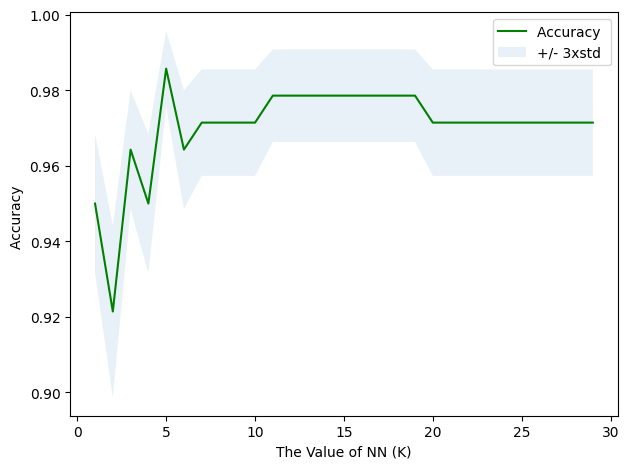



The best accuracy was with 0.9857142857142858 with k= 5


In [43]:
#find the best accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks =30  #only change this value   #xaxis
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): #volume

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) #n= bassed on value of the neighbour
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])   #value of the accuracy- the y axis

#print (mean_acc) - this is the accuracy value

print ('')
print ('')


#Visualize

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
# What can i conclude from this analysis?

'''
# Based on the analysis, we can conclude that the best accuracy for the K-Nearest Neighbors (KNN) model
  was achieved with a k value of [mean_acc.argmax()+1]. This means that considering the [mean_acc.argmax()+1]
  nearest neighbors of a data point provides the most accurate predictions for breast cancer classification
  in this dataset.

# Further conclusions:

  - Model Performance: The maximum accuracy achieved provides a baseline for evaluating the KNN model's
    performance on this dataset.
  - Optimal K: The optimal k value suggests the level of complexity that best captures the relationships
    between features and the target variable (breast cancer class).

'''